# Examples of image data preprocessing
This file is to display the results of data preprocessing.
<h1 style="text-align:right">$\mathcal{ZLF}$ </h1>

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

The shape of image: (1080, 1586, 3)


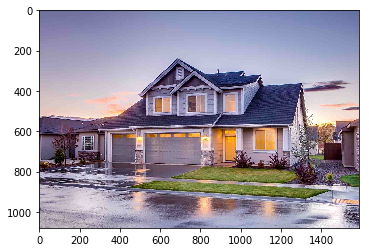

In [2]:
# the original image
img = cv2.imread('house.jpg')
# to show the image
print('The shape of image:', img.shape)
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);

The shape of resized image: (1080, 1080, 3)


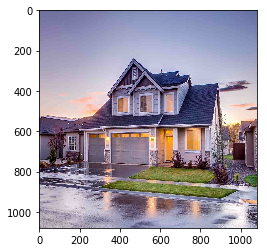

In [3]:
# resize
img_resize = cv2.resize(img, dsize = (1080, 1080), interpolation = cv2.INTER_CUBIC)
# save the image
cv2.imwrite('house_resize.jpg', img_resize)
# show the image
print('The shape of resized image:', img_resize.shape)
img_show = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);

The shape of gray image: (1080, 1586)


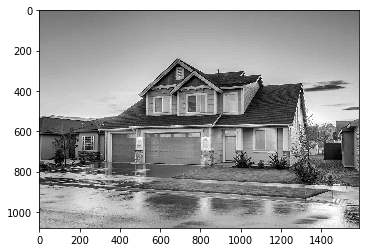

In [4]:
# the gray image
img_gray = cv2.imread('house.jpg', 0)
# save the gray image
cv2.imwrite('house_gray.jpg', img_gray)
# to show the image
print('The shape of gray image:', img_gray.shape)
img_show = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);

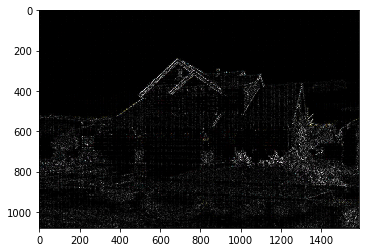

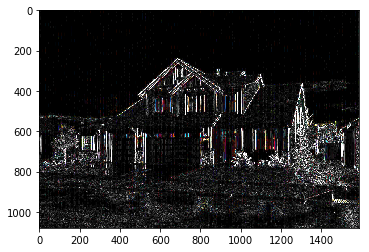

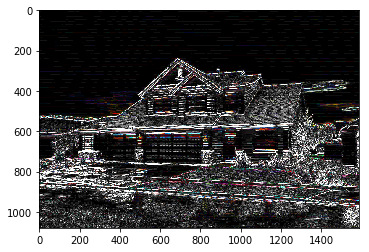

In [5]:
# sobel edge detection
edges = cv2.Sobel(img,cv2.CV_16S,1,1) 
# float to uint8
edges = cv2.convertScaleAbs(edges) 
cv2.imwrite('house_sobel.jpg', edges)
plt.figure()
plt.imshow(edges,plt.cm.gray);

# sobel horizental
edges = cv2.Sobel(img,cv2.CV_16S,1,0) 
edgesh = cv2.convertScaleAbs(edges) 
cv2.imwrite('house_sobel_h.jpg', edgesh)
plt.figure()
plt.imshow(edgesh,plt.cm.gray);

# sobel vertical
edges = cv2.Sobel(img,cv2.CV_16S,0,1) 
edgesv = cv2.convertScaleAbs(edges) 
cv2.imwrite('house_sobel_v.jpg', edgesv)
plt.figure()
plt.imshow(edgesv,plt.cm.gray);

The shape of canny image: (1080, 1586)


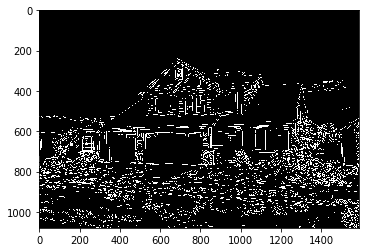

In [6]:
# canny edge detection
img_canny = cv2.GaussianBlur(img_gray, (3,3), 0) # Gaussian Blur
canny = cv2.Canny(img_canny, 50, 150)
# save the image
cv2.imwrite('house_canny.jpg', canny)
# show the image
print('The shape of canny image:', canny.shape)
img_show = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);

The shape of hist image: (1080, 1586)


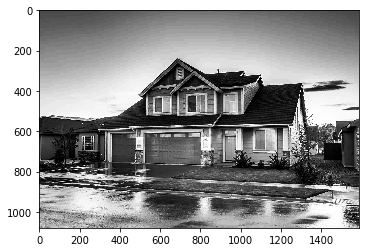

In [7]:
# Histogram equalization
hist = cv2.equalizeHist(img_gray)
# save the image
cv2.imwrite('house_hist.jpg', hist)
# show the image
print('The shape of hist image:', hist.shape)
img_show = cv2.cvtColor(hist, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);

## Data augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

C:\Scripts\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
img_generator = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.3
    )

(1, 1080, 1586, 3)

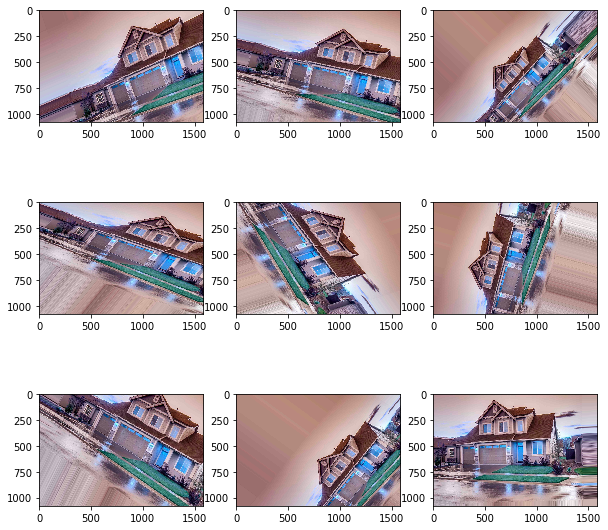

In [10]:
# add one dimension
x = np.expand_dims(img, axis=0)
# generate new images
gen = img_generator.flow(x, batch_size=1)

# show the image
plt.figure(figsize = (10, 10))
for i in range(3):
    for j in range(3):
        x_batch = next(gen)
        idx = (3*i) + j
        plt.subplot(3, 3, idx+1)
        plt.imshow(x_batch[0]/256)
x_batch.shape